In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
with open("./dataset/train.json",'r', encoding="UTF-8") as f:
    train_data = json.load(f)

In [4]:
train_data[0]

{'ID': 1,
 'Content': '奉和袭美抱疾杜门见寄次韵  陆龟蒙虽失春城醉上期，下帷裁遍未裁诗。因吟郢岸百亩蕙，欲采商崖三秀芝。栖野鹤笼宽使织，施山僧饭别教炊。但医沈约重瞳健，不怕江花不满枝。',
 'Questions': [{'Question': '下列对这首诗的理解和赏析，不正确的一项是',
   'Choices': ['A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。',
    'B．由于友人患病，原有的约会被暂时搁置，作者游春的诗篇也未能写出。',
    'C．作者虽然身在书斋从事教学，但心中盼望能走进自然，领略美好春光。',
    'D．尾联使用了关于沈约的典故，可以由此推测皮日休所患的疾病是目疾。'],
   'Answer': 'A',
   'Q_id': '000101'}]}

In [5]:
len(train_data)

6313

In [7]:
train_df = []

for i in range(len(train_data)):
    data = train_data[i]
    content = data["Content"]
    questions = data["Questions"]
    for item in questions:
        item["Content"] = content
        train_df.append(item)
    
train_df[0]

{'Question': '下列对这首诗的理解和赏析，不正确的一项是',
 'Choices': ['A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。',
  'B．由于友人患病，原有的约会被暂时搁置，作者游春的诗篇也未能写出。',
  'C．作者虽然身在书斋从事教学，但心中盼望能走进自然，领略美好春光。',
  'D．尾联使用了关于沈约的典故，可以由此推测皮日休所患的疾病是目疾。'],
 'Answer': 'A',
 'Q_id': '000101',
 'Content': '奉和袭美抱疾杜门见寄次韵  陆龟蒙虽失春城醉上期，下帷裁遍未裁诗。因吟郢岸百亩蕙，欲采商崖三秀芝。栖野鹤笼宽使织，施山僧饭别教炊。但医沈约重瞳健，不怕江花不满枝。'}

In [9]:
train_df = pd.DataFrame(train_df)

In [10]:
train_df

,Question,Choices,Answer,Q_id,Content
0,下列对这首诗的理解和赏析，不正确的一项是,"[A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。, B．由于友人患病，原...",A,000101,奉和袭美抱疾杜门见寄次韵 陆龟蒙虽失春城醉上期，下帷裁遍未裁诗。因吟郢岸百亩蕙，欲采商崖三...
1,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...,"[A. 肆虐 凋凌, B. 集结 昼夜兼程, C. 版图 稚嫩, D. 嫣然 抱憾退出]",A,000201,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...
2,依次选用文中括号里的词语，最恰当的一项是,"[A. 席卷 系 扩展, B. 笼罩 停 扩展, C. 席卷 停 扩充, D. ...",A,000202,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...
3,下列对材料相关内容的理解，不正确的一项是,[A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操纵...,D,000301,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...
4,下列对材料相关内容的概括和分析，不正确的一项是,[A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安全...,C,000302,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...
...,...,...,...,...,...
15416,根据原文内容，下列说法不正确的一项是,[A．所谓“古今通”就是指要寻求中国法治的历史脉络，就是要通晓中国古今法治的联系，把握法治发...,B,631303,现在我国的法学教育出现了法学院专业设置越来越细的新情况，把原来一个法学院拆分为民商法学院、经...
15417,1.阅读原文内容，下列说法符合原文第一段和第二段内容的是,[A、“科学公园”刊登的那篇署名“挣脱枷锁的囚徒”的文章介绍了电离辐射的常识，通过那篇文章再...,C,631401,背景辐射没有危害吗\n\n方舟子\n\n有一个自称做“科普”的叫“科学公园”的网站，登了一篇...
15418,结合原文，有关“背景辐射”的理解不正确的一项是,[A、“背景辐射”也是“电离辐射”，也能对人体细胞造成损伤，当然对人体是有危害的，理论上任何...,D,631402,背景辐射没有危害吗\n\n方舟子\n\n有一个自称做“科普”的叫“科学公园”的网站，登了一篇...
15419,下列表述，与原文意思不符的一项是,[A．“提笔忘字”时不去翻字典，而是拿出手机用拼音打出忘记的字，反映的是越来越多的中国人不再...,C,631501,日前美国《洛杉矶时报》的一则报道一石激起千层浪：“由于使用拼音发手机短信及电脑打字正在取代拥...


In [12]:
train_df.head()

,Question,Choices,Answer,Q_id,Content
0,下列对这首诗的理解和赏析，不正确的一项是,"[A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。, B．由于友人患病，原...",A,000101,奉和袭美抱疾杜门见寄次韵 陆龟蒙虽失春城醉上期，下帷裁遍未裁诗。因吟郢岸百亩蕙，欲采商崖三...
1,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...,"[A. 肆虐 凋凌, B. 集结 昼夜兼程, C. 版图 稚嫩, D. 嫣然 抱憾退出]",A,000201,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...
2,依次选用文中括号里的词语，最恰当的一项是,"[A. 席卷 系 扩展, B. 笼罩 停 扩展, C. 席卷 停 扩充, D. ...",A,000202,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...
3,下列对材料相关内容的理解，不正确的一项是,[A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操纵...,D,000301,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...
4,下列对材料相关内容的概括和分析，不正确的一项是,[A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安全...,C,000302,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...


In [13]:
with open("./dataset/validation.json", 'r',encoding="UTF-8") as f1:
    test_data = json.load(f1)

In [14]:
test_data[0]

{'ID': 1,
 'Content': '周鼎传①公讳鼎，字实甫，自为童子时即以言动自持，趋立多中礼。早岁善属文，补邑诸生，坚意嗜读，贯综今古，而范诸先行，常倾其伦辈。②葵丑，成进士，为晋宁司理。居官廉正，吏惮其守，一切馈遗不敢入。治狱多平反，即疑案滞讼，一讯辄得其情。老胥巨猾皆咋舌退，周敢鬻法以上下其间。时有巡盐使者送犯拘罪，公讯无实，辄释之。其公方不阿类如此。③典试山东，持鉴朗察，所得皆知名士。方在闱中，薛韩城时为莱郡司理，手一卷力荐之。公视其文疵谬不可入穀．比至再，乃与同事者搜阅得一卷，共为击节，及发牍，为郝君名晋者，实宿寒名士。既复捷去，公方以得人为慰。④以左布政使调巡嘉湖，湖地剧难治，又多势家豪仆，飞舸肆掠，略无所忌。公一日过乌镇，见拥噪千人，号泣震远迩。询之，曰：“朱家奴掠人也。”立捕两奴及舟械至奴犹称相国从者意不下。公弗顾，益尽法惩之，民距跃称快。自是豪强屏息，终公之任，无敢暴掠为非。⑤公孝友出于至性，廉于其身，而处人唯恐不厚。与人相接。无贫富长幼皆整容礼之。或人有非理之请，虽亲厚必直辞拒之，不妄徇也。其在任时，戚属间有所欲言，公对庄语，多意沮而寝。居家垂二十年，敦伦赈乏，居德正俗，不出户庭而系天下之望，人以比之范文正云。',
 'Questions': [{'Question': '文中“自是豪强屏息”中“屏”的意思是',
   'Choices': ['A、屏住呼吸', 'B、收敛行迹', 'C、退避迁徙', 'D、抑止打压'],
   'Q_id': '000101'},
  {'Question': '文中“多意沮而寝”中“寝”的意思是',
   'Choices': ['A、睡觉', 'B、丑陋', 'C、隐蔽', 'D、停止'],
   'Q_id': '000102'},
  {'Question': '第④段断句正确的一项是',
   'Choices': ['A、立捕两奴/及舟械至奴/犹称相国/从者意不下。',
    'B、立捕两奴/及舟/械至奴/犹称相国/从者意不下。',
    'C、立捕两奴/及舟械至奴/犹称相国从者/意不下。',
    'D、立捕两奴及舟械/至奴/犹称相国从者/意不下。'],
   'Q_id': '000103'}],
 'Type': '11',
 'Diff': 1}

In [15]:
test_df=[]

In [16]:
for i in range(len(test_data)):
    data = test_data[i]
    content = data["Content"]
    questions = data["Questions"]
    qtype = data["Type"]
    diff = data["Diff"]
    for item in questions:
        item["Content"] = content
        item["Type"] = qtype
        item["Diff"] = diff
        
        test_df.append(item)

In [18]:
test_df = pd.DataFrame(test_df)

In [19]:
test_df.head()

,Question,Choices,Q_id,Content,Type,Diff
0,文中“自是豪强屏息”中“屏”的意思是,"[A、屏住呼吸, B、收敛行迹, C、退避迁徙, D、抑止打压]",000101,周鼎传①公讳鼎，字实甫，自为童子时即以言动自持，趋立多中礼。早岁善属文，补邑诸生，坚意嗜读，...,11,1
1,文中“多意沮而寝”中“寝”的意思是,"[A、睡觉, B、丑陋, C、隐蔽, D、停止]",000102,周鼎传①公讳鼎，字实甫，自为童子时即以言动自持，趋立多中礼。早岁善属文，补邑诸生，坚意嗜读，...,11,1
2,第④段断句正确的一项是,"[A、立捕两奴/及舟械至奴/犹称相国/从者意不下。, B、立捕两奴/及舟/械至奴/犹称相国/...",000103,周鼎传①公讳鼎，字实甫，自为童子时即以言动自持，趋立多中礼。早岁善属文，补邑诸生，坚意嗜读，...,11,1
3,"下列对文中""三年权知礼部贡举会大雪苦寒士坐庭中噤未能言轼宽其禁约使得尽技巡铺内侍每摧辱举子且...",[A．三年/权知礼部贡举/会大雪苦寒/士坐庭中/噤未能言/轼宽其禁约/使得尽技/巡辅内侍每摧...,000201,苏轼字子瞻，眉州眉山人。母程氏亲授以书，闻古今成败，辄能语其要。嘉佑二年，试礼部，主司欧阳修...,11,6
4,下列对原文有关内容的概括和分析，不正确的一项是,[A．苏轼自幼聪颖，深受时贤赏识。母亲亲自为他授课，他往往能说出要点。欧阳修十分看重他，曾对...,000202,苏轼字子瞻，眉州眉山人。母程氏亲授以书，闻古今成败，辄能语其要。嘉佑二年，试礼部，主司欧阳修...,11,6


In [20]:
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv",index=False)

In [23]:
train_df["content_len"] =train_df["Content"].apply(len)
test_df["content_len"] =test_df["Content"].apply(len)

In [24]:
train_df.content_len.describe()

count    15421.000000
mean      1039.781272
std        435.583878
min         38.000000
25%        744.000000
50%       1067.000000
75%       1251.000000
max       3047.000000
Name: content_len, dtype: float64

In [25]:
test_df.content_len.describe()

count    2444.000000
mean     1054.175941
std       438.861006
min        52.000000
25%       758.000000
50%      1067.000000
75%      1262.000000
max      4640.000000
Name: content_len, dtype: float64

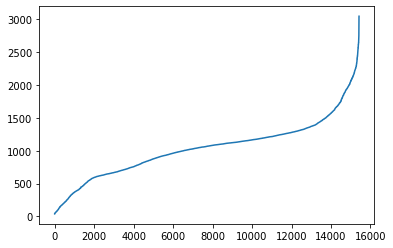

In [27]:
plt.plot(sorted(train_df.content_len))

In [30]:
train_df["Answer"].value_counts()

C    4633
B    4096
D    3994
A    2698
Name: Answer, dtype: int64

<AxesSubplot:>

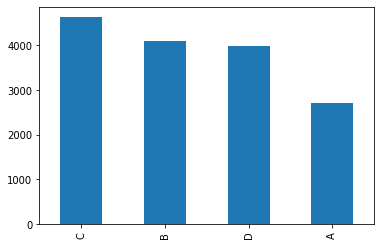

In [34]:
train_df["Answer"].value_counts().plot.bar()

In [39]:
train_df.Choices.apply(lambda x: len(x))

0        4
1        4
2        4
3        4
4        4
        ..
15416    4
15417    4
15418    4
15419    4
15420    4
Name: Choices, Length: 15421, dtype: int64

In [42]:
train_df["num_choices"] = train_df.Choices.apply(lambda x: len(x))
train_df["num_choices"].value_counts()

4    15325
3       71
2       25
Name: num_choices, dtype: int64

In [43]:
train_df.head()

,Question,Choices,Answer,Q_id,Content,content_len,num_choices
0,下列对这首诗的理解和赏析，不正确的一项是,"[A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。, B．由于友人患病，原...",A,000101,奉和袭美抱疾杜门见寄次韵 陆龟蒙虽失春城醉上期，下帷裁遍未裁诗。因吟郢岸百亩蕙，欲采商崖三...,81,4
1,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...,"[A. 肆虐 凋凌, B. 集结 昼夜兼程, C. 版图 稚嫩, D. 嫣然 抱憾退出]",A,000201,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...,364,4
2,依次选用文中括号里的词语，最恰当的一项是,"[A. 席卷 系 扩展, B. 笼罩 停 扩展, C. 席卷 停 扩充, D. ...",A,000202,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...,364,4
3,下列对材料相关内容的理解，不正确的一项是,[A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操纵...,D,000301,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...,1348,4
4,下列对材料相关内容的概括和分析，不正确的一项是,[A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安全...,C,000302,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...,1348,4


In [49]:
!pip install transformers

     |████████████████████████████████| 1.9 MB 41 kB/s eta 0:00:01
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
     |████████████████████████████████| 2.2 MB 45 kB/s eta 0:00:010
     |████████████████████████████████| 883 kB 43 kB/s eta 0:00:01
     |████████████████████████████████| 284 kB 38 kB/s eta 0:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=5dab087bd3d8854525df666dd815a857d8e1ea995765e2eadd4c9c70e2a26c7d
  Stored in directory: /Users/gaozhiyong/Library/Caches/pip/wheels/49/25/98/cdea9c79b2d9a22ccc59540b1784b67f06b633378e97f58da2
Successfully built sacremoses
You should consider upgrading via the '/Users/gaozhiyong/Documents/pyenv/pyenv3.6/bin/python -m pip install --upgrade pip' command.


In [50]:
import json
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
import random
import os
import time
from sklearn.model_selection import *
from transformers import *

In [66]:
CFG = {
    'fold_num':5,
    'seed':42,
    'model':'./uncased_L-2_H-128_A-2/',
    'max_len':128,
    'epochs':8,
    'train_bs':2,
    'lr':2e-5,
    'num_workers':2,
    'accum_iter':1,
    'weight_decay':1e-4,  # 权重衰减 防止过拟合
    'device':0,
}

In [57]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHEDD"] = str(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
seed_everything(CFG['seed'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [58]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [59]:
train_df.head()

,Question,Choices,Answer,Q_id,Content
0,下列对这首诗的理解和赏析，不正确的一项是,"['A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。', 'B．由于友人患...",A,101,奉和袭美抱疾杜门见寄次韵 陆龟蒙虽失春城醉上期，下帷裁遍未裁诗。因吟郢岸百亩蕙，欲采商崖三...
1,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...,"['A. 肆虐 凋凌', 'B. 集结 昼夜兼程', 'C. 版图 稚嫩', 'D. ...",A,201,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...
2,依次选用文中括号里的词语，最恰当的一项是,"['A. 席卷 系 扩展', 'B. 笼罩 停 扩展', 'C. 席卷 停 扩充...",A,202,隆冬之际，西伯利亚的寒流（笼罩/席卷）欧亚大陆，狂风肆虐，草木凋凌，而那些春天的元素——温暖...
3,下列对材料相关内容的理解，不正确的一项是,['A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操...,D,301,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...
4,下列对材料相关内容的概括和分析，不正确的一项是,['A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安...,C,302,材料一：日前，中国科学院在京召开新闻发布会对外宣布“墨子号”进行科学实验卫星提前并圆满实现全...


In [60]:
train_df["Answer"].apply(lambda x : ['A','B','C','D'].index(x))

0        0
1        0
2        0
3        3
4        2
        ..
15416    1
15417    2
15418    3
15419    2
15420    2
Name: Answer, Length: 15421, dtype: int64

In [61]:
train_df["label"] = train_df["Answer"].apply(lambda x : ['A','B','C','D'].index(x))

In [63]:
test_df["label"] = 0

In [67]:
tokenizer = BertTokenizer.from_pretrained(CFG['model'])

In [68]:
tokenizer

PreTrainedTokenizer(name_or_path='./uncased_L-2_H-128_A-2/', vocab_size=30522, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [93]:
train_df.Choices.values[0][2:-2].split('\',\'')

["A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。', 'B．由于友人患病，原有的约会被暂时搁置，作者游春的诗篇也未能写出。', 'C．作者虽然身在书斋从事教学，但心中盼望能走进自然，领略美好春光。', 'D．尾联使用了关于沈约的典故，可以由此推测皮日休所患的疾病是目疾。"]

In [94]:
class MyDataSet(Dataset):
    def __init__(self,dataframe):
        self.df = dataframe
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        label = self.df.values[idx]
        question = self.df.Question.values[idx]
        content = self.df.Content.values[idx]
        choice = self.df.Choices.values[idx][2:-2].split('\',\'')
        if len(choice) < 4:
            for i in range(4 -len(choice)):
                choice.append("D. 不知道")
                
        content = [content for i in range(len(choice))]
        pair = [question + ' ' + i[2:] for i in choice]
        
        return content, pair ,label

In [95]:
def collate_fn(data):
    input_ids , attention_mask, token_type_ids = [], [], []
    for x in data:
        text = tokenizer(x[1], text_pair=x[0], padding='max_length',truncation=True,max_length=CFG['max_len'],return_tensors='pt')
        input_ids.append(text['input_ids'].tolist())
        attention_mask.append(text['attention_mask'].tolist())
        token_type_ids.append(text['token_type_ids'].tolistist())
    input_ids = torch.tensor(input_ids)
    attention_mask = torch.tensor(attention_mask)
    token_type_ids = torch.tensor(token_type_ids)
    label = torch.tensor([x[-1] for x in data])
    
    return input_ids,attention_mask, token_type_ids,label

In [96]:
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self,val,n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def train_model(model, train_loader):
    model.train()
    
    losses
    